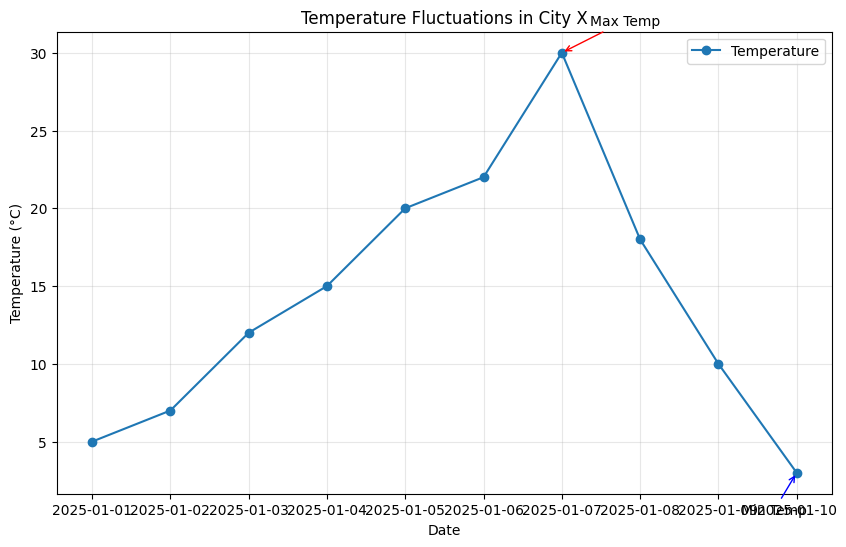

In [1]:
# Exercise 1

import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = {
    "Date": pd.date_range("2025-01-01", periods=10),
    "Temperature": [5, 7, 12, 15, 20, 22, 30, 18, 10, 3]
}
df_temp = pd.DataFrame(data)

# Line graph
plt.figure(figsize=(10,6))
plt.plot(df_temp["Date"], df_temp["Temperature"], marker="o", label="Temperature")

# Annotate extreme values
max_idx = df_temp["Temperature"].idxmax()
min_idx = df_temp["Temperature"].idxmin()
plt.annotate("Max Temp", xy=(df_temp["Date"][max_idx], df_temp["Temperature"][max_idx]),
             xytext=(+20, +20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="red"))
plt.annotate("Min Temp", xy=(df_temp["Date"][min_idx], df_temp["Temperature"][min_idx]),
             xytext=(-40, -30), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", color="blue"))

plt.title("Temperature Fluctuations in City X")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-3540213225.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  city_data = df.loc[("Canada", "Ontario", "Toronto")]


Average temp: 1.0


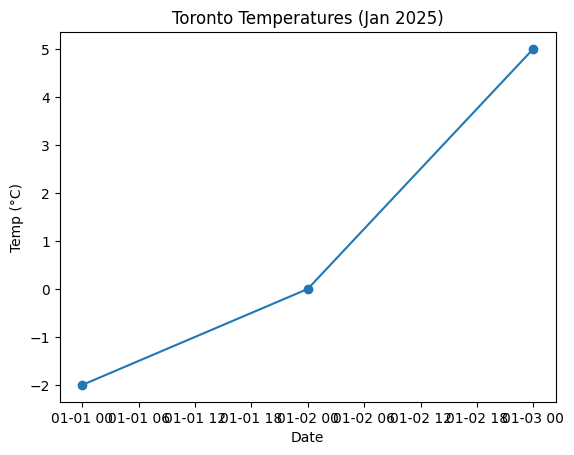

In [2]:
# Exercise 2

# Create hierarchical dataset
data = {
    ("Canada", "Ontario", "Toronto", "2025-01-01"): -2,
    ("Canada", "Ontario", "Toronto", "2025-01-02"): 0,
    ("Canada", "Ontario", "Toronto", "2025-01-03"): 5,
    ("Canada", "Ontario", "Ottawa", "2025-01-01"): -5,
    ("USA", "California", "Los Angeles", "2025-01-01"): 20,
}
df = pd.Series(data, name="Temperature").to_frame()
df.index = pd.MultiIndex.from_tuples(df.index, names=["Country", "State", "City", "Date"])

# Filter Canada, Toronto, date range
city_data = df.loc[("Canada", "Ontario", "Toronto")]
city_data.index = pd.to_datetime(city_data.index)
filtered = city_data.loc["2025-01-01":"2025-01-03"]

# Average temperature
print("Average temp:", filtered["Temperature"].mean())

# Visualization
plt.plot(filtered.index, filtered["Temperature"], marker="o")
plt.title("Toronto Temperatures (Jan 2025)")
plt.xlabel("Date")
plt.ylabel("Temp (°C)")
plt.show()


Enter number of plots (1–9): 1


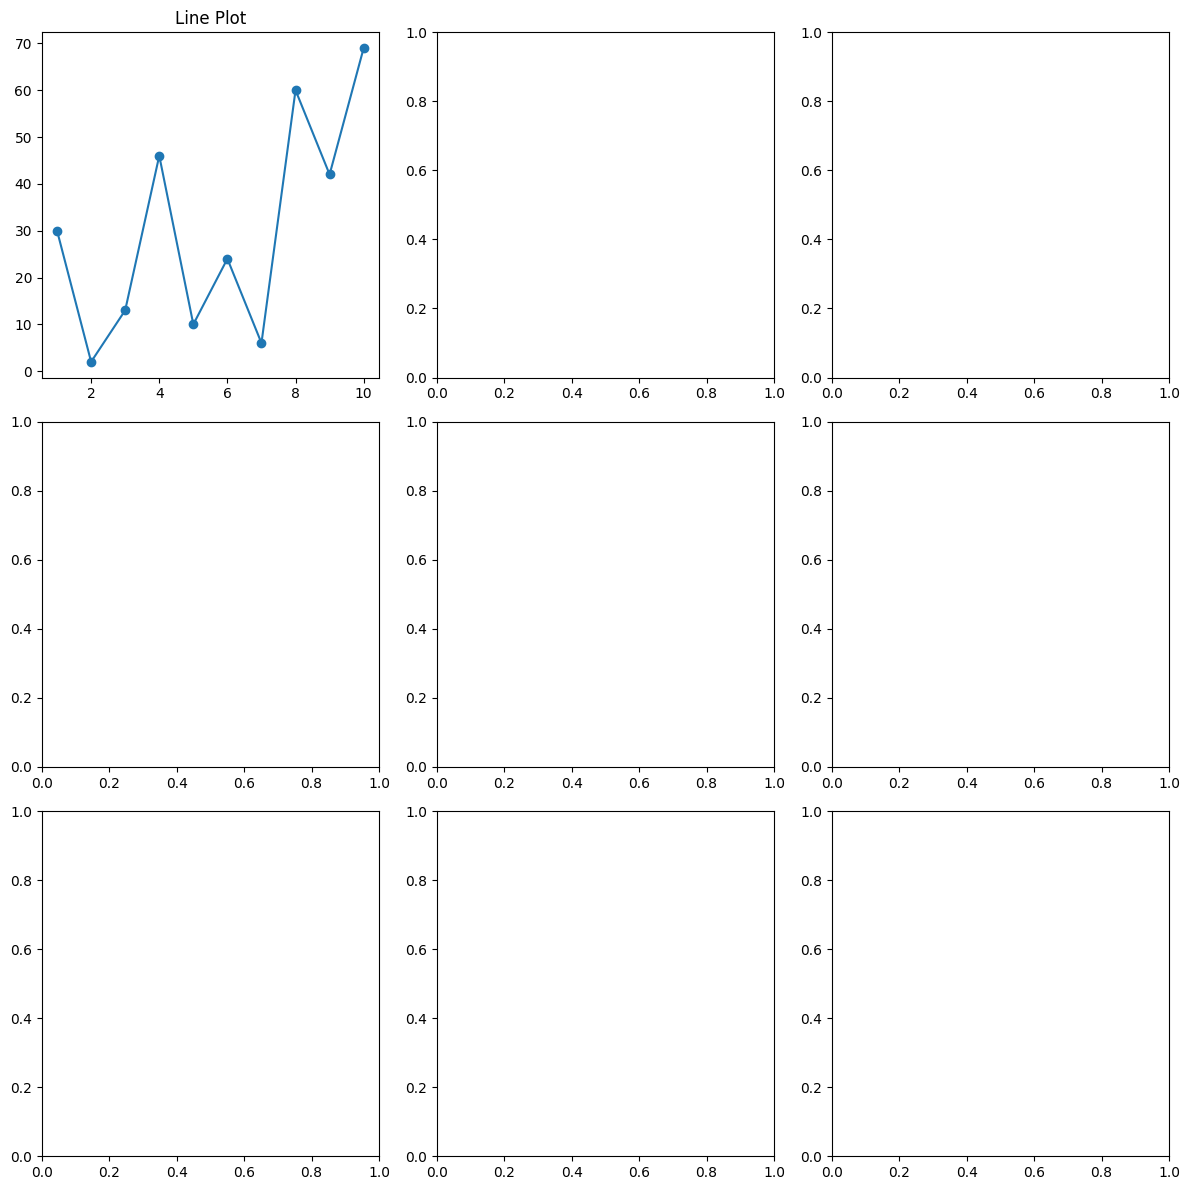

In [3]:
# Exercise 3

import numpy as np

# User input
n = int(input("Enter number of plots (1–9): "))

# Create grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Generate random plots
for i in range(n):
    x = np.arange(1, 11)
    y = np.random.randint(1, 100, 10)

    if i % 4 == 0:
        axes[i].plot(x, y, marker="o")
        axes[i].set_title("Line Plot")
    elif i % 4 == 1:
        axes[i].scatter(x, y, color="green")
        axes[i].set_title("Scatter Plot")
    elif i % 4 == 2:
        axes[i].bar(x, y, color="orange")
        axes[i].set_title("Bar Plot")
    else:
        axes[i].hist(y, bins=5, color="purple")
        axes[i].set_title("Histogram")

plt.tight_layout()
plt.show()


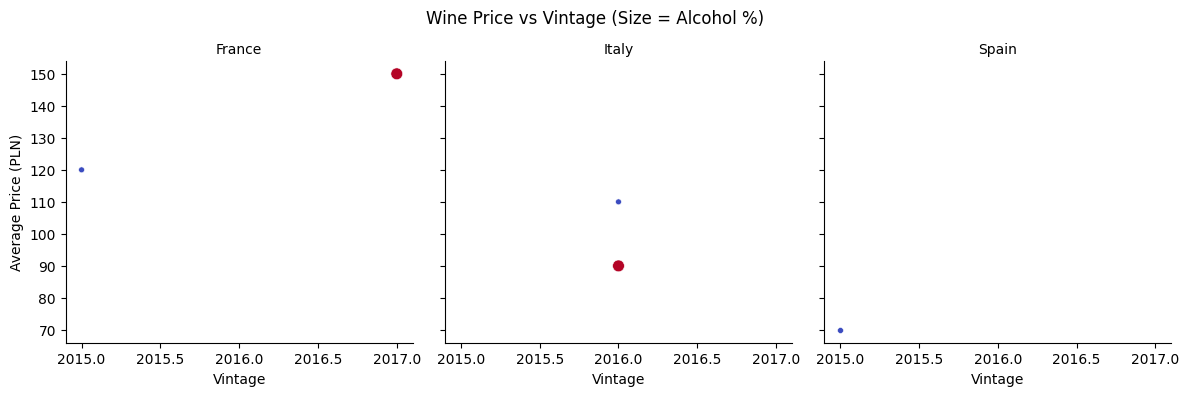

In [4]:
# Exercise 4

import seaborn as sns

# Example dataset
wine_data = {
    "Country": ["France", "Italy", "Spain", "France", "Italy"],
    "Vintage": [2015, 2016, 2015, 2017, 2016],
    "Price": [120, 90, 70, 150, 110],
    "Alcohol": [13.5, 14.0, 13.0, 14.5, 13.8]
}
df_wine = pd.DataFrame(wine_data)

# FacetGrid
g = sns.FacetGrid(df_wine, col="Country", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="Vintage", y="Price", size="Alcohol", hue="Alcohol", palette="coolwarm", legend=True)
g.set_titles("{col_name}")
g.set_axis_labels("Vintage", "Average Price (PLN)")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Wine Price vs Vintage (Size = Alcohol %)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RMSE: 24.87012987012986
R²: nan


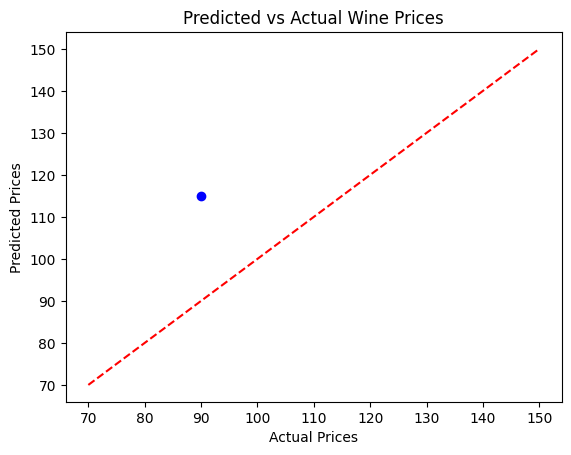

In [6]:
# Exercise 5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset
wine_data = {
    "Country": ["France", "Italy", "Spain", "France", "Italy"],
    "Vintage": [2015, 2016, 2015, 2017, 2016],
    "Alcohol": [13.5, 14.0, 13.0, 14.5, 13.8],
    "Price": [120, 90, 70, 150, 110]
}
df_wine = pd.DataFrame(wine_data)

# Preprocessing
df_encoded = pd.get_dummies(df_wine, columns=["Country"], drop_first=True)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R²:", r2)

# Scatter plot
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Wine Prices")
plt.show()


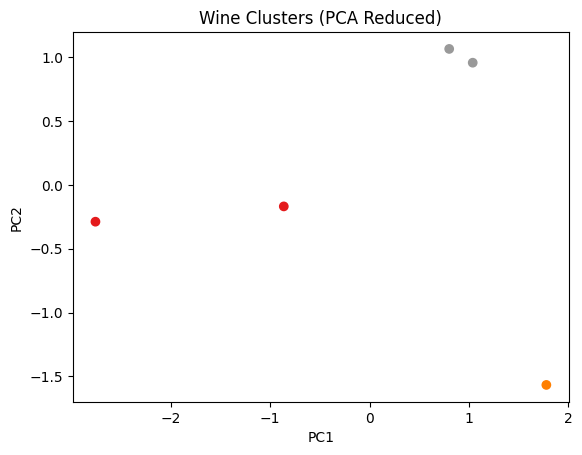

In [7]:
# Exercise 6

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preprocess
features = df_encoded.drop("Price", axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled)
df_encoded["Cluster"] = clusters

# PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap="Set1")
plt.title("Wine Clusters (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
